### introduction

##### The data set includes 7043 rows and 21 columns and  information about:

1）Customers who left within the last month – the column is called Churn

2）Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3）Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4）Demographic info about customers – gender, age range, and if they have partners and dependents


##### Objectives of this analysis:

1）What is the current performance of user churn?

2）Investigate the characteristics of churned users and propose recommendations to reduce customer churn.

3）Train a model for predicting user churn.

### 1.loading libraries and datasets

In [1]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.colors
from plotly.subplots import make_subplots
import statsmodels.api as sm
import matplotlib
import warnings

warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\Olivia.Ding\Desktop\面试\kaggle项目\电信客户流失\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### 2.cleaning data

see the basic information of data at first

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

customerID: 7043
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 73
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1585
TotalCharges: 6531
Churn: 2


change the data type of churn, SeniorCitizen and TotalCharges

In [8]:
df['Churn']=df['Churn'].replace({'No':0,'Yes':1}).astype(int)

In [9]:
df['SeniorCitizen']=df['SeniorCitizen'].replace({0:'No',1:'Yes'})

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

Since there are only 11 rows contain missing values, which account for only 1% of the total data, I have decided to drop these 11 rows.

In [11]:
df_null=df[df['TotalCharges'].isnull() == True]
df_null

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female            No     Yes        Yes       0   
753   3115-CZMZD    Male            No      No        Yes       0   
936   5709-LVOEQ  Female            No     Yes        Yes       0   
1082  4367-NUYAO    Male            No     Yes        Yes       0   
1340  1371-DWPAZ  Female            No     Yes        Yes       0   
3331  7644-OMVMY    Male            No     Yes        Yes       0   
3826  3213-VVOLG    Male            No     Yes        Yes       0   
4380  2520-SGTTA  Female            No     Yes        Yes       0   
5218  2923-ARZLG    Male            No     Yes        Yes       0   
6670  4075-WKNIU  Female            No     Yes        Yes       0   
6754  2775-SEFEE    Male            No      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN      0  
753                Mailed check          20.25           NaN      0  
936                Mailed check          80.85           NaN      0  
1082               Mailed check          25.75           NaN      0  
1340    Credit card (automatic)          56.05           NaN      0  
3331               Mailed check          19.85           NaN      0  
3826               Mailed check          25.35           NaN      0  
4380               Mailed check          20.00           NaN      0  
5218               Mailed check          19.70  

In [12]:
df=df.dropna()

check the cleaning result

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
df.describe()

tenure  MonthlyCharges  TotalCharges        Churn
count  7032.000000     7032.000000   7032.000000  7032.000000
mean     32.421786       64.798208   2283.300441     0.265785
std      24.545260       30.085974   2266.771362     0.441782
min       1.000000       18.250000     18.800000     0.000000
25%       9.000000       35.587500    401.450000     0.000000
50%      29.000000       70.350000   1397.475000     0.000000
75%      55.000000       89.862500   3794.737500     1.000000
max      72.000000      118.750000   8684.800000     1.000000

In [15]:
df=df.iloc[:,1:]

### 3. exploratory data analysis

In this section, we will analyze the first three objectives

#### 1）What is the current performance of user churn?

In [16]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [17]:
df['Churn'].value_counts().sum()

7032

In [18]:
churn_counts = df['Churn'].value_counts()
churn_rate=churn_counts[1]/churn_counts.sum()
churn_rate

0.26578498293515357

In [19]:
labels=['retention','churn']
values=list(churn_counts)
fig=go.Figure(data=go.Pie(labels=labels,values=values,hole=.3))
fig.show()

In the previous month, there were a total of 7,032 users, out of which 1,869 users churned, accounting for a percentage of 26.6%.

#### 2）Investigate the characteristics of churned users and propose recommendations to reduce customer churn.

firstly I divided features into categorical and numerical features

In [20]:
categorical_feature=df.select_dtypes(include='object')
numerical_feature=df.select_dtypes(exclude='object')

In [21]:
categorical_feature.head()

gender SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female            No     Yes         No           No  No phone service   
1    Male            No      No         No          Yes                No   
2    Male            No      No         No          Yes                No   
3    Male            No      No         No           No  No phone service   
4  Female            No      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  
0           Electronic check  
1               Mailed check  
2               Mailed check  
3  Bank transfer (automatic)  
4           Electronic check

In [22]:
numerical_feature.head()

tenure  MonthlyCharges  TotalCharges  Churn
0       1           29.85         29.85      0
1      34           56.95       1889.50      0
2       2           53.85        108.15      1
3      45           42.30       1840.75      0
4       2           70.70        151.65      1

I will categorize the features into three groups and explore the relationship between these categorical features and the churn rate. 

s-customer service: PhoneService, MultipleLine, InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV,StreamingMovies

i-account information: Contract,PaperlessBilling,PaymentMethod

d-demographic information– gender, SeniorCitizen, Partner,Dependents


In [23]:
s=list(categorical_feature.iloc[:,4:-3].columns)
i=list(categorical_feature.iloc[:,-3:-1].columns)
d=list(categorical_feature.iloc[:,0:4].columns)

I will analysis customer service at first（s-customer service: PhoneService, MultipleLine, InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,StreamingTV,StreamingMovies）

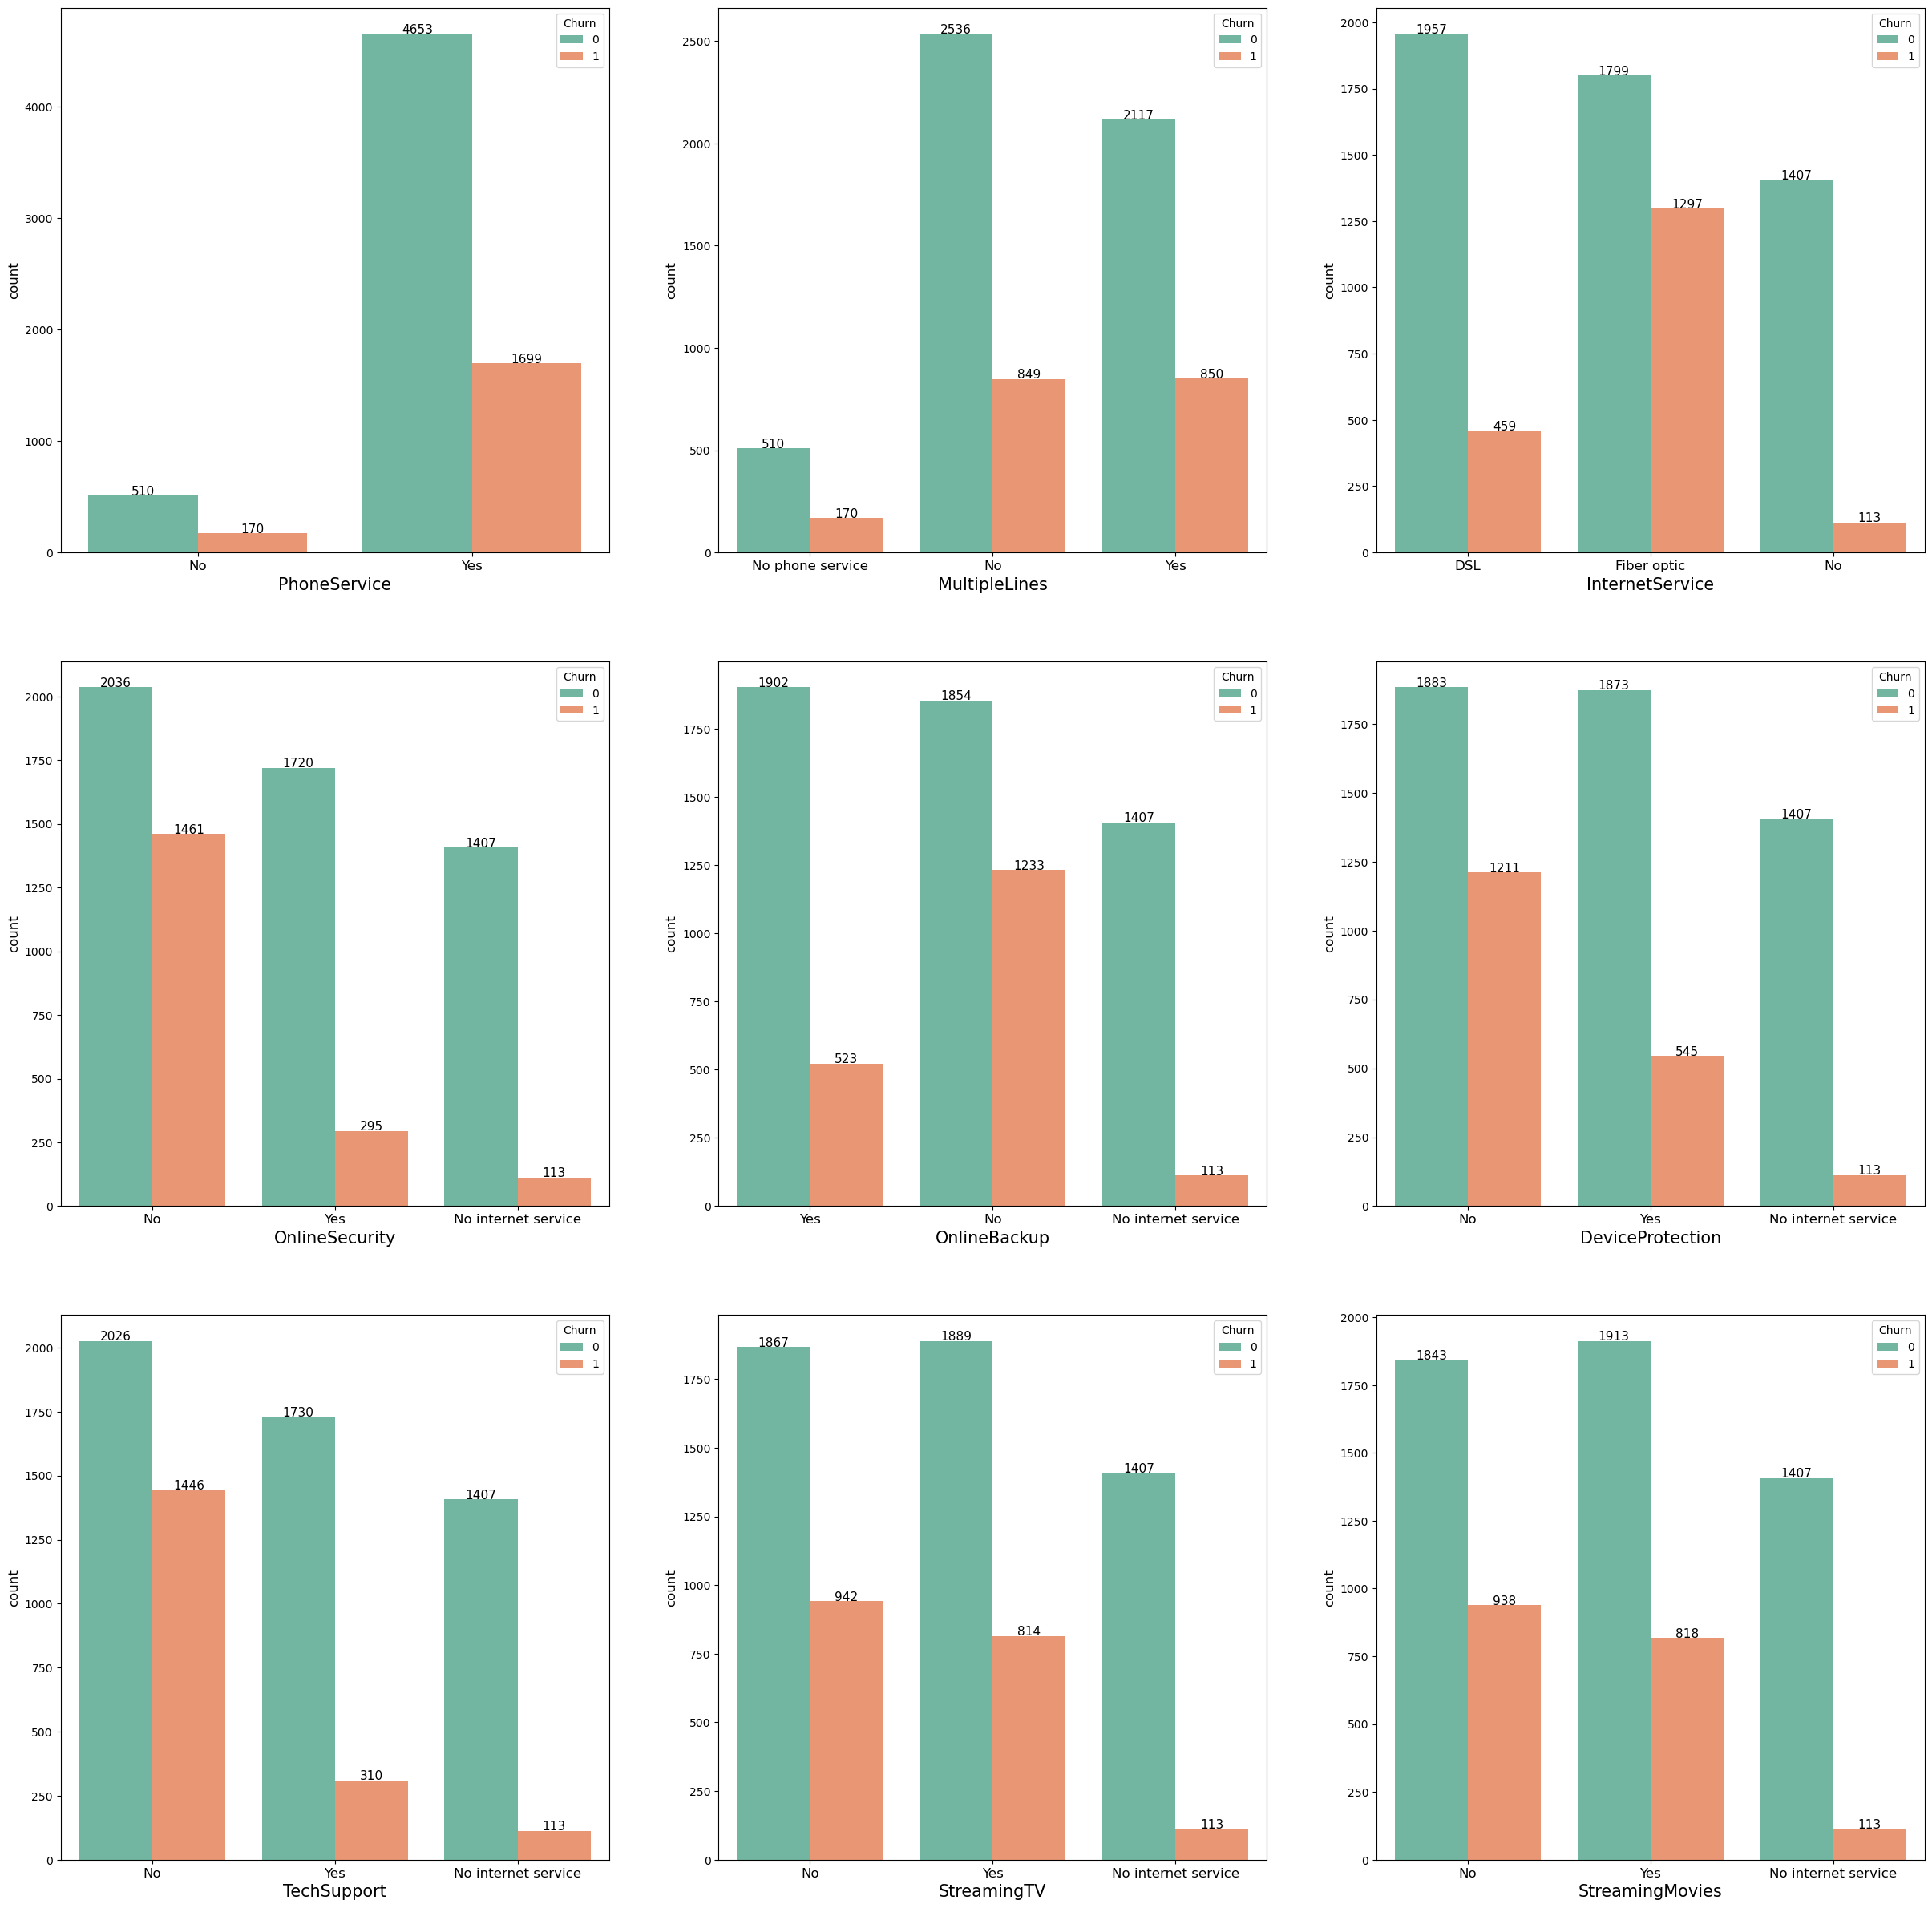

In [24]:
color_palette = sns.color_palette("Set2")
fig=plt.subplots(nrows=3, ncols=3, figsize=(30, 30))
for i in range(len(s)):
    plt.subplot(3,3,i+1)
    ax=sns.countplot(s[i],data=df,hue='Churn',palette=color_palette)
    ax.set_xlabel(s[i], fontsize=15)
    ax.set_ylabel('count', fontsize=12)  
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    for labour in ax.patches:
        ax.text(labour.get_x() + labour.get_width() / 2, labour.get_height() + 2, labour.get_height(), horizontalalignment='center', fontsize = 11)

plt.show()


In the 9 service types, we can observe that the basic services include phone service, multiple lines, and Internet service.

Regarding phone service, a small portion of users do not have phone service, and the presence or absence of phone service does not significantly impact customer churn.

For multiple lines, users with multiple lines have a churn rate that is 3% lower than that of single-line users, but the difference is not significant.

In terms of Internet service, the choice of different internet options has a significant effect on customer churn. 41% of users who chose fiber optic service have churned, compared to only 18% churn rate for users who chose DSL. Additionally, we can observe that the number of fiber optic users is twice that of DSL users. Here, we can further analyze the relationship between different internet services and customer churn to determine if it is a correlation or a causal relationship. We can also explore the characteristics of DSL service or the features of DSL users that contribute to the lower churn rate.

Moving on to advanced value-added services, including online security, online backup, device protection, and tech support, users who opt for these services account for approximately 30% of the total users. Furthermore, users who choose these value-added services generally exhibit 2-3 times higher retention rates compared to those who do not. The churn rates for users who choose different value-added services follow the following order: online security < tech support < online backup < device protection.

Additionally, we have streaming services, and the choice of streaming service does not have a significant impact on customer churn.

After that let us explore account information features(account information: Contract,PaperlessBilling,PaymentMethod)

In [25]:
contract_churn=df.groupby(['Contract','Churn']).size().unstack()
a=contract_churn.T*100.0 / contract_churn.T.sum()
a=a.T
a

Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665

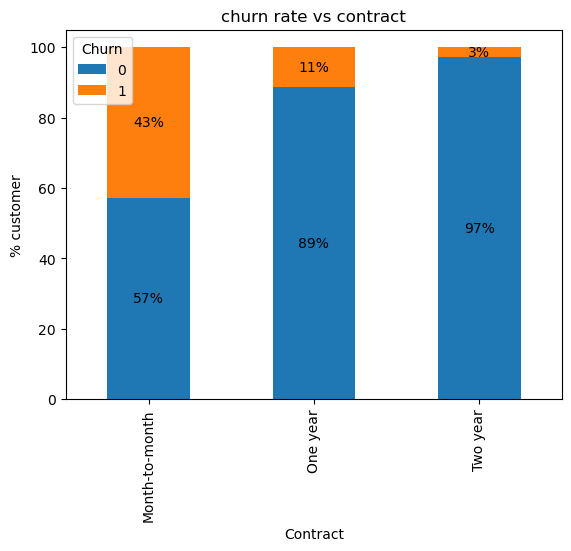

In [26]:
ax=a.plot(kind='bar',stacked=True)
ax.set_ylabel('% customer')
ax.set_title('churn rate vs contract')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    label = '{:.0f}%'.format(height)
    label_x = x + width / 2
    label_y = y + height * 0.5
    ax.annotate(label, (label_x, label_y),
                ha='center',
                va='center')

We can see that with different contracts, the longer the contract duration, the higher the customer retention rate. Approximately half of the users on month-to-month contracts have churned. Therefore, for longer-term contracts, we can explore offering incentives to encourage users to sign contracts with extended durations.

In [27]:
PaperlessBilling_churn=df.groupby(['PaperlessBilling','Churn']).size().unstack()
p=PaperlessBilling_churn.T*100.0 / PaperlessBilling_churn.T.sum()
p

PaperlessBilling         No        Yes
Churn                                 
0                 83.624302  66.410749
1                 16.375698  33.589251

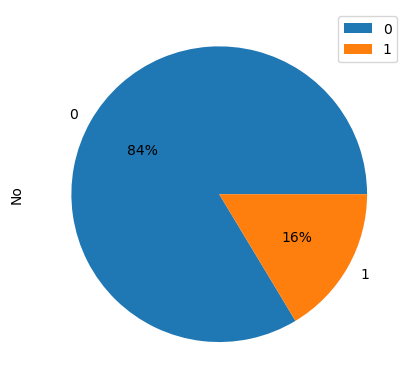

In [28]:
ax1=p.plot(y='No',kind='pie',autopct='%1.0f%%')

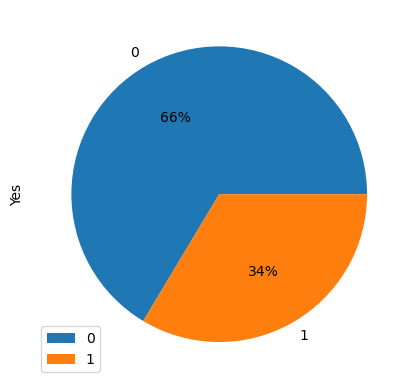

In [29]:
ax2=p.plot(y='Yes',kind='pie',autopct='%1.0f%%')

We can observe that there is a correlation between PaperlessBilling and churn rate. Customers who use PaperlessBilling have a higher churn rate of around 20%. This finding can be taken into account when predicting churn rate in the future, by incorporating this factor into the churn rate prediction models.

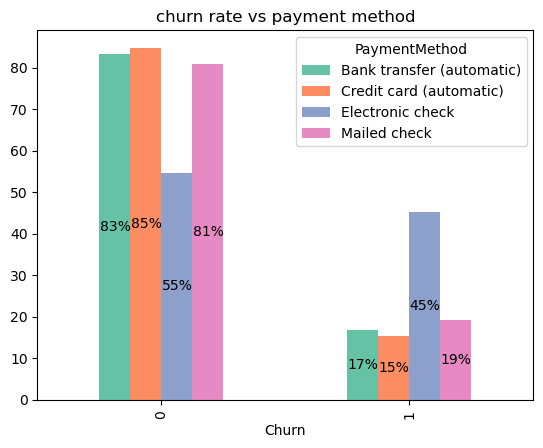

In [30]:
color_palette = sns.color_palette("Set2")
paymentmethod_churn=df.groupby(['PaymentMethod','Churn']).size().unstack()
pm=paymentmethod_churn.T*100/paymentmethod_churn.T.sum()
ax=pm.plot(kind='bar',color=color_palette )
ax.set_title('churn rate vs payment method')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    label = '{:.0f}%'.format(height)
    label_x = x + width / 2
    label_y = y + height * 0.5
    ax.annotate(label, (label_x, label_y),
                ha='center',
                va='center')

In [31]:
paymentmethod_churn

Churn                         0     1
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308

The choice of payment method is clearly correlated with the customer churn rate. Specifically, customers who opt for electronic checks exhibit the highest churn rate at 45%, whereas the churn rates for other payment methods remain around 15%. This significant disparity calls for further exploration into the factors that contribute to the elevated churn rate associated with electronic check payments.

To gain a deeper understanding of this phenomenon, additional analysis can be conducted to investigate the potential reasons behind the stark difference in churn rates between electronic checks and other payment methods. Factors such as user experience, convenience, security, and trustworthiness should be taken into account. Additionally, examining the demographic and behavioral patterns of customers in relation to their payment method preferences can provide valuable insights.

After that we can explore relationship between demographic information and churn rate,include gender, SeniorCitizen, Partner,Dependents

In [32]:
# write a function at first
def plot_churn_rate(column_name):
    color_palette = sns.color_palette("Set2")
    column_churn = df.groupby([column_name, 'Churn']).size().unstack()
    churn_percentage = column_churn.T * 100 / column_churn.T.sum()
    
    ax = churn_percentage.plot(kind='bar', color=color_palette)
    ax.set_title('Churn Rate vs. {}'.format(column_name))
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        label = '{:.0f}%'.format(height)
        label_x = x + width / 2
        label_y = y + height * 0.5
        ax.annotate(label, (label_x, label_y), ha='center', va='center')
    
    plt.show()

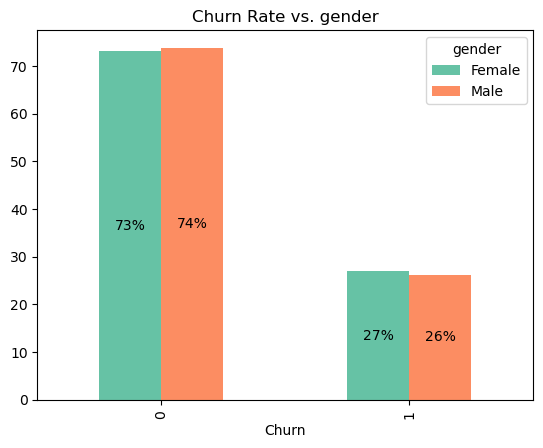

In [33]:
plot_churn_rate('gender')

it is apparent that the customer gender distribution is similar, and gender does not appear to have a significant influence on the customer churn rate.

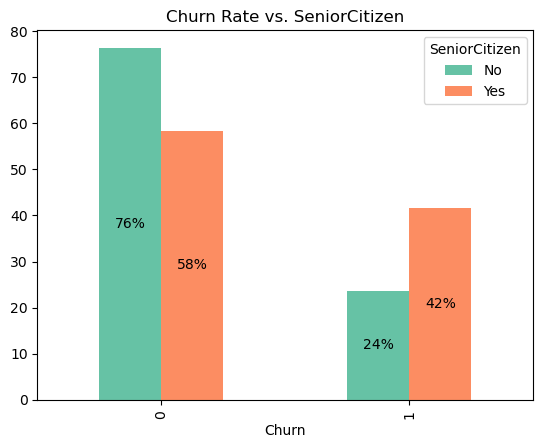

In [34]:
plot_churn_rate('SeniorCitizen')

it is evident from the analysis that senior citizens comprise only 16% of the customer base. Surprisingly, approximately 70% of senior citizens have churned, which is a  40% higher than other age groups.

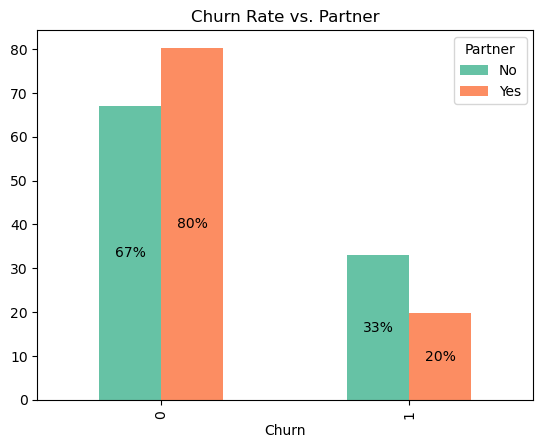

In [35]:
plot_churn_rate('Partner')

We can observe that there is a relationship between whether a user has a partner and their churn rate. If a user has a partner, the churn rate on the platform is 10% lower compared to users without a partner.

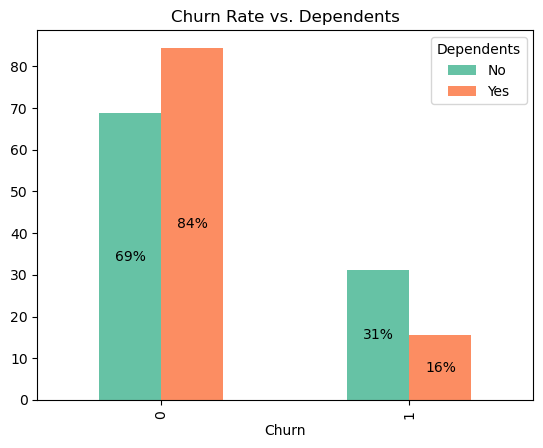

In [36]:
plot_churn_rate('Dependents')

Similarly, if a user has dependents, their churn rate is also lower compared to users without dependents, and the difference in churn rates between the two groups is more significant. However, it is worth noting that there are significantly fewer users with dependents on the platform compared to users with partners, which is also related to the relatively low proportion of senior citizen users.

##### After that we can observe the relationship between numerical features and churn rate

In [37]:
def plot_churn_distribution(variable_name):
    sns.set_context("paper", font_scale=1.1)
    fig, ax = plt.subplots()

    # Plot histogram
    sns.histplot(df[variable_name][(df["Churn"] == 0)], color="Red", ax=ax)
    sns.histplot(df[variable_name][(df["Churn"] == 1)], color="Blue", ax=ax)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(variable_name)
    ax.set_title('Distribution of {} by churn'.format(variable_name))

    # Calculate churn rate
    churn_rate = df.groupby(variable_name)['Churn'].mean().reset_index()
    
    # Smooth churn rate using Loess
    
    lowess = sm.nonparametric.lowess(churn_rate['Churn'], churn_rate[variable_name])
    smoothed_churn_rate = lowess[:, 1]

    # Plot smoothed churn rate as a line plot
    ax2 = ax.twinx()
    ax2.plot(churn_rate[variable_name], smoothed_churn_rate, color='Green', marker='o', linewidth=2)
    ax2.set_ylabel('Churn Rate')
    ax2.set_ylim(0, 1)
    ax2.legend(['Churn Rate'], loc='upper left')

    plt.show()

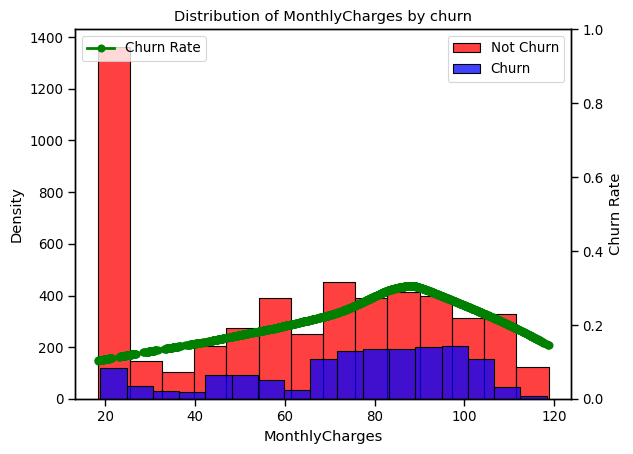

In [38]:
plot_churn_distribution('MonthlyCharges')

Here, we can observe the general trend of the churn rate increasing as the monthly charges increase. The churn rate gradually decreases after reaching around 90$. This could be due to a couple of reasons. 


Firstly, I guess customers with lower monthly charges are likely to have signed annual contracts, which we verified and found to be true. 

In [39]:
contract_monthlycharges = df.groupby('Contract')['MonthlyCharges'].quantile([0.25, 0.5, 0.75])
contract_monthlycharges

Contract            
Month-to-month  0.25    45.8500
                0.50    73.2500
                0.75    88.8750
One year        0.25    28.8125
                0.50    68.7500
                0.75    94.8125
Two year        0.25    24.0500
                0.50    64.4500
                0.75    90.5500
Name: MonthlyCharges, dtype: float64

Secondly, the decreasing churn rate after 90 dollars could be attributed to the addition of extra services. These additional services might help in reducing the churn rate. We verified this hypothesis by specifically examining the impact of the "DeviceProtection" service and found that it does indeed have an effect after the 90$. 

In [40]:
service_monthlycharges=df.groupby('DeviceProtection')['MonthlyCharges'].quantile([0.25,0.5,0.75])
service_monthlycharges

DeviceProtection         
No                   0.25     54.300
                     0.50     74.000
                     0.75     86.050
No internet service  0.25     19.700
                     0.50     20.150
                     0.75     20.900
Yes                  0.25     70.050
                     0.50     88.575
                     0.75    102.600
Name: MonthlyCharges, dtype: float64

Therefore, we can further validate the conclusion that encouraging longer-term contracts and promoting additional services can help reduce the churn rate.

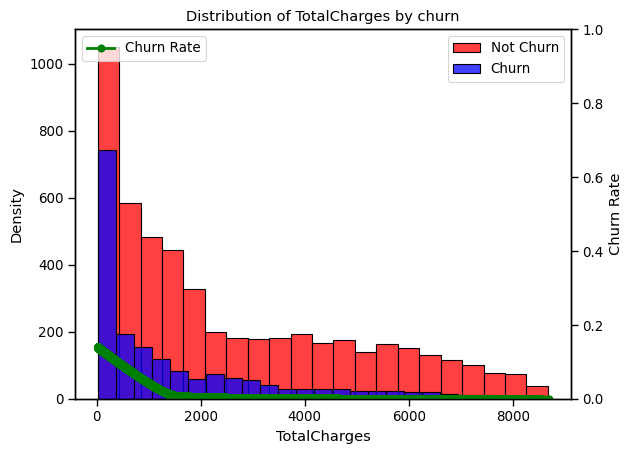

In [41]:
plot_churn_distribution('TotalCharges')

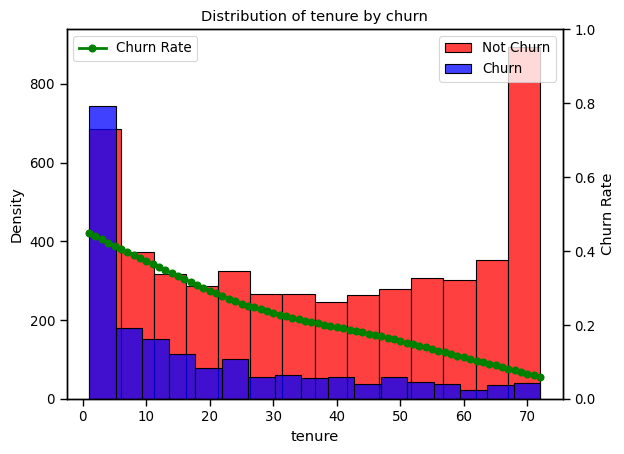

In [42]:
plot_churn_distribution('tenure')

From here, we can observe that as the total charges increase, the churn rate decreases. This inference can be attributed to the fact that as the total charges increase, it indicates that the customers have been using the services for a longer duration. As customers gradually become long-term users, the churn rate tends to decrease. This could be because long-term users have already established a level of satisfaction with the services and are less likely to switch or discontinue their subscription. Therefore, the trend of lower churn rates with higher total charges can be associated with the customer's tenure and loyalty to the service.

##### summary of characteristics of churned users and recommendations

The factors that have a positive impact on user retention include advanced services (such as OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport), basic user information (such as SeniorCitizen, Partner, Dependents), user contract information (such as Contract, PaperlessBilling, PaymentMethod), and the type of basic service, InternetService.

##### From the basic analysis, it can be observed that:

#####  1) Guiding users to extend their contract periods and encouraging them to add additional services are beneficial in reducing user churn.        

##### 2) Improve electronic check payment experience may reduce the churn rate

##### 3) Introducing family services, offering discounts, or providing referral rewards to encourage users to add dependents or partners to the platform can be beneficial in reducing user churn.

##### Future iteration

However, it is important to note that these results only demonstrate correlation and not causation. Therefore, it cannot be directly inferred that factors negatively correlated with churn can reduce user churn, as there may be other specific influencing factors. For example, in the case of InternetService, users who choose DSL have a retention rate twice as high as users with other types of InternetService. This may indicate better quality DSL service, issues with other services, or specific characteristics of DSL service, such as higher pricing attracting higher-quality users, resulting in higher retention rates.

To conduct a more comprehensive analysis and explore long-term effects, the following improvements are recommended:

1）Introduce additional data indicators: To analyze and explore causality more comprehensively, consider incorporating more data indicators related to user churn. For example, in addition to user services and contract information, factors such as user behavior data, usage frequency, and complaint records can be considered to obtain a more holistic analysis.

2）Utilize causal inference methods: To determine causality more accurately, consider employing causal inference methods such as propensity score matching (PSM) or experimental design (such as randomized controlled trials). These methods can help establish stronger causal evidence and eliminate potential confounding factors.

3）Conduct in-depth qualitative research: In addition to quantitative analysis, qualitative research can provide better insights into user motivations, attitudes, and needs. Conducting in-depth interviews and gathering user feedback can provide more specific insights into the underlying reasons for user churn and guide improvement measures.

4）Perform long-term tracking analysis: Long-term tracking analysis of user churn and retention can provide more accurate results. By observing user behavior and churn rates over different time periods, a better understanding of the long-term impact of factors on user retention can be gained.

In conclusion, by incorporating additional data indicators, causal inference methods, qualitative research, and long-term tracking analysis, a stronger understanding and evidence of causality can be established. These improvements will provide more reliable foundations for identifying factors influencing user churn and developing corresponding improvement measures. Continuous data analysis and evaluation will contribute to refining these strategies, reducing churn rates, and enhancing user loyalty.


### 3) Train a model for predicting user churn

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, neighbors,tree
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [44]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [45]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### I will do feature engineering at first, this part include standardization and  target encoding 

In [46]:
# change all yes,no to 1,0
le=LabelEncoder()
df_features=['SeniorCitizen', 'Partner', 'Dependents','PhoneService','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling']
df1=df.copy()
for i in df_features:
    df1[i]=le.fit_transform(df1[i]) 

In [47]:
df1.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  Female              0        1           0       1             0   
1    Male              0        0           0      34             1   
2    Male              0        0           0       2             1   
3    Male              0        0           0      45             0   
4  Female              0        0           0       2             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0  No phone service             DSL               0             2   
1                No             DSL               2             0   
2                No             DSL               2             2   
3  No phone service             DSL               2             0   
4                No     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 2            0            0                0   
2                 0            0            0                0   
3                 2            2            0                0   
4                 0            0            0                0   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges  Churn  
0           29.85         29.85      0  
1           56.95       1889.50      0  
2           53.85        108.15      1  
3           42.30       1840.75      0  
4           70.70        151.65      1

In [48]:
# use one hot encoder to change unordered categorical variable
feature=['gender','MultipleLines','InternetService','Contract','PaymentMethod']
df1_encoded = pd.get_dummies(df1[feature])
df1 = pd.concat([df1, df1_encoded], axis=1)
df1.drop(feature,axis=1,inplace=True)

In [49]:
df1.head()

SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity  \
0              0        1           0       1             0               0   
1              0        0           0      34             1               2   
2              0        0           0       2             1               2   
3              0        0           0      45             0               2   
4              0        0           0       2             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             2                 0            0            0  ...   
1             0                 2            0            0  ...   
2             2                 0            0            0  ...   
3             0                 2            2            0  ...   
4             0                 0            0            0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 30 columns]

In [50]:
# scale numerical features
feature=['tenure','MonthlyCharges', 'TotalCharges']
ss=StandardScaler()
df1[feature]=ss.fit_transform(df1[feature])

In [51]:
df1.head()

SeniorCitizen  Partner  Dependents    tenure  PhoneService  OnlineSecurity  \
0              0        1           0 -1.280248             0               0   
1              0        0           0  0.064303             1               2   
2              0        0           0 -1.239504             1               2   
3              0        0           0  0.512486             0               2   
4              0        0           0 -1.239504             1               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  ...  \
0             2                 0            0            0  ...   
1             0                 2            0            0  ...   
2             2                 0            0            0  ...   
3             0                 2            2            0  ...   
4             0                 0            0            0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 30 columns]

##### After that choose some features related to user churn (correlationship analysis) and organize final dataset to build the model

<AxesSubplot:>

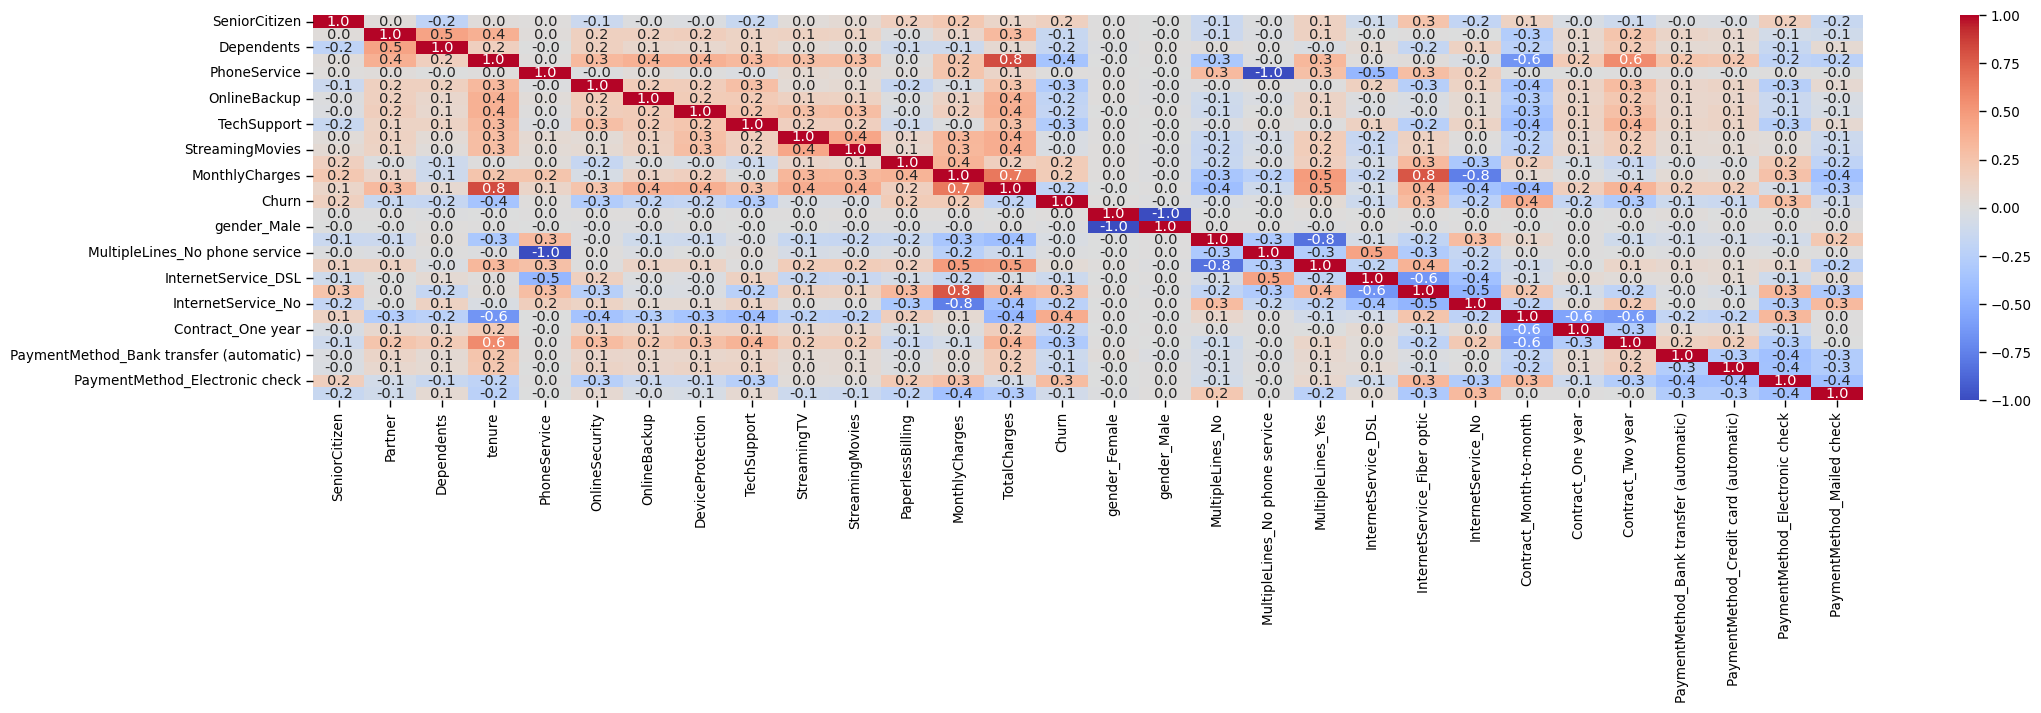

In [52]:
corr=df1.corr()
plt.figure(figsize=(25,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")

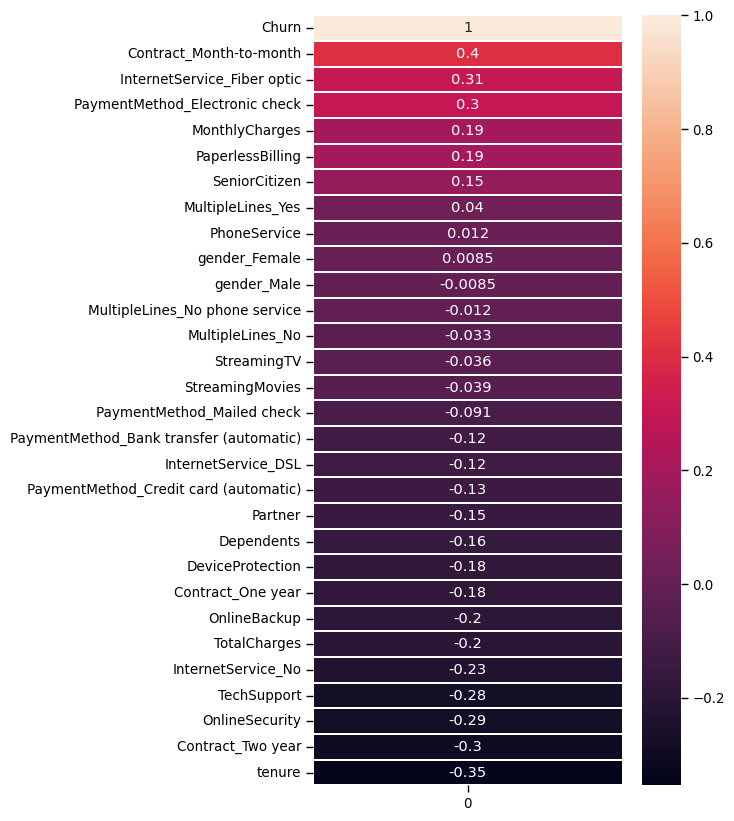

In [53]:
corr_churn = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
plt.subplots(figsize = (5,10))
sns.heatmap(corr_churn,annot = True,linewidths = 0.3);

In [54]:
# remove features which correlation are between -0.1 and 0.1
a=corr_churn[((corr_churn > -0.1) & (corr_churn < 0))| ((corr_churn > 0) & (corr_churn < 0.1))].dropna()
a=list(a.index)
a

['MultipleLines_Yes',
 'PhoneService',
 'gender_Female',
 'gender_Male',
 'MultipleLines_No phone service',
 'MultipleLines_No',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod_Mailed check']

In [55]:
df1=df1.drop(a,axis=1)
df1.head()

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0 -1.280248               0             2   
1              0        0           0  0.064303               2             0   
2              0        0           0 -1.239504               2             2   
3              0        0           0  0.512486               2             0   
4              0        0           0 -1.239504               0             0   

   DeviceProtection  TechSupport  PaperlessBilling  MonthlyCharges  ...  \
0                 0            0                 1       -1.161694  ...   
1                 2            0                 0       -0.260878  ...   
2                 0            0                 1       -0.363923  ...   
3                 2            2                 0       -0.747850  ...   
4                 0            0                 1        0.196178  ...   

   Churn  InternetService_DSL  InternetService_Fiber optic  \
0      0                    1                            0   
1      0                    1                            0   
2      1                    1                            0   
3      0                    1                            0   
4      1                    0                            1   

   InternetService_No  Contract_Month-to-month  Contract_One year  \
0                   0                        1                  0   
1                   0                        0                  1   
2                   0                        1                  0   
3                   0                        0                  1   
4                   0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  
0                                      0                               1  
1                                      0                               0  
2                                      0                               0  
3                                      0                               0  
4                                      0                               1  

[5 rows x 21 columns]

In [56]:
target=df1['Churn'].to_frame().astype(int)
target

Churn
0         0
1         0
2         1
3         0
4         1
...     ...
7038      0
7039      0
7040      0
7041      1
7042      0

[7032 rows x 1 columns]

In [57]:
features=df1.drop(columns='Churn',axis=1)
features

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  \
0                 0        1           0 -1.280248               0   
1                 0        0           0  0.064303               2   
2                 0        0           0 -1.239504               2   
3                 0        0           0  0.512486               2   
4                 0        0           0 -1.239504               0   
...             ...      ...         ...       ...             ...   
7038              0        1           1 -0.343137               2   
7039              0        1           1  1.612573               0   
7040              0        1           1 -0.872808               2   
7041              1        1           0 -1.158016               0   
7042              0        0           0  1.368109               2   

      OnlineBackup  DeviceProtection  TechSupport  PaperlessBilling  \
0                2                 0            0                 1   
1                0                 2            0                 0   
2                2                 0            0                 1   
3                0                 2            2                 0   
4                0                 0            0                 1   
...            ...               ...          ...               ...   
7038             0                 2            2                 1   
7039             2                 2            0                 1   
7040             0                 0            0                 1   
7041             0                 0            0                 1   
7042             0                 2            2                 1   

      MonthlyCharges  TotalCharges  InternetService_DSL  \
0          -1.161694     -0.994194                    1   
1          -0.260878     -0.173740                    1   
2          -0.363923     -0.959649                    1   
3          -0.747850     -0.195248                    1   
4           0.196178     -0.940457                    0   
...              ...           ...                  ...   
7038        0.664868     -0.129180                    1   
7039        1.276493      2.241056                    0   
7040       -1.170004     -0.854514                    1   
7041        0.319168     -0.872095                    0   
7042        1.357932      2.012344                    0   

      InternetService_Fiber optic  InternetService_No  \
0                               0                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               1                   0   
...                           ...                 ...   
7038                            0                   0   
7039                            1                   0   
7040                            0                   0   
7041                            1                   0   
7042                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0               

##### After that we can check the distribution of sample

<AxesSubplot:>

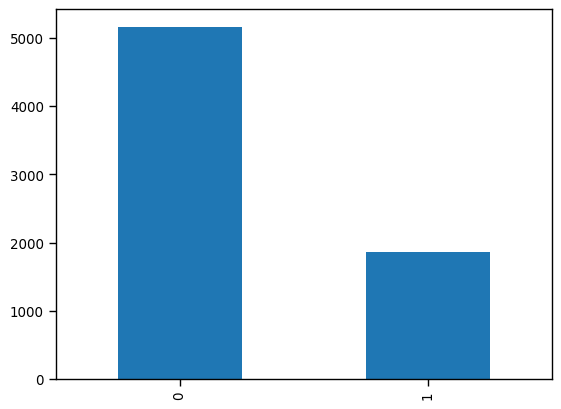

In [58]:
pd.value_counts(df1['Churn']).plot(kind='bar') 

#####  we can find sample is not balance here, so I use under sampling here 

In [59]:
model_undersample = RandomUnderSampler()
x_new,y_new=model_undersample.fit_resample(features,target)

In [60]:
x_new

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  \
3933              0        0           0 -0.954296               1   
2742              0        0           0  1.368109               2   
692               0        0           1  0.593974               1   
2989              0        0           1 -1.280248               1   
1112              1        0           0  1.571829               2   
...             ...      ...         ...       ...             ...   
7021              0        0           0 -0.832064               0   
7026              0        0           0 -0.954296               0   
7032              1        0           0 -1.280248               0   
7034              0        0           0  1.408853               2   
7041              1        1           0 -1.158016               0   

      OnlineBackup  DeviceProtection  TechSupport  PaperlessBilling  \
3933             1                 1            1                 0   
2742             2                 2            2                 0   
692              1                 1            1                 0   
2989             1                 1            1                 1   
1112             2                 2            2                 0   
...            ...               ...          ...               ...   
7021             0                 0            2                 1   
7026             0                 0            0                 1   
7032             0                 0            0                 1   
7034             2                 2            0                 1   
7041             0                 0            0                 1   

      MonthlyCharges  TotalCharges  InternetService_DSL  \
3933       -1.499084     -0.927641                    0   
2742        0.131359      0.954840                    1   
692        -1.470830     -0.560419                    0   
2989       -1.515705     -0.998893                    0   
1112        0.832733      1.769228                    1   
...              ...           ...                  ...   
7021       -0.166143     -0.686267                    1   
7026       -0.684694     -0.829411                    1   
7032        0.364042     -0.973944                    0   
7034        1.268182      2.030764                    0   
7041        0.319168     -0.872095                    0   

      InternetService_Fiber optic  InternetService_No  \
3933                            0                   1   
2742                            0                   0   
692                             0                   1   
2989                            0                   1   
1112                            0                   0   
...                           ...                 ...   
7021                            0                   0   
7026                            0                   0   
7032                            1                   0   
7034                            1                   0   
7041                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
3933                        1                  0                  0   
2742                        0                  0                  1   
692                         0                  1                  0   
2989                        1                  0                  0   
1112                        0                  0                  1   
...                       ...                ...                ...   
7021                        0                  1                  0   
7026                        1                  0                  0   
7032                        1                  0                  0   
7034                        1                  0                  0   
7041                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
3933            

<AxesSubplot:>

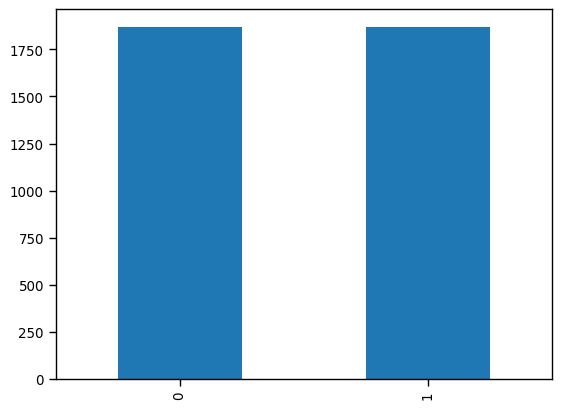

In [61]:
pd.value_counts(y_new['Churn']).plot(kind='bar')

#####  After under sample two data labels number are similar and  we start build model here and will compare 

### 4. build model

in this section I will build model and compare 4 models to find a best result here

In [62]:
# split train_set and test_set
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x_new,y_new,test_size=0.3,random_state=100)

First, I select some models and then evaluate their performance without hyperparameter tuning to identify the models that show promising results. These promising models will be candidates for further use in the subsequent steps.

In [63]:
classifiers = {
    'Decision Tree': tree.DecisionTreeClassifier(random_state=30),
    'Logistic Regression': LogisticRegression(random_state=30),
    'Random Forest': RandomForestClassifier(random_state=30),
    'SVM': svm.SVC(probability=True, random_state=30),
    'KNN': neighbors.KNeighborsClassifier()
}

results = {}


for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    y_pred = clf.predict(Xtest)
    y_prob = clf.predict_proba(Xtest)[:, 1]
    
    accuracy = accuracy_score(Ytest, y_pred)
    auc = AUC(Ytest, y_prob)
    
    results[name] = {'Accuracy': accuracy, 'AUC': auc}


for name, metrics in results.items():
    print(f'{name} - Accuracy: {metrics["Accuracy"]:.4f}, AUC: {metrics["AUC"]:.4f}')

Decision Tree - Accuracy: 0.6800, AUC: 0.6812
Logistic Regression - Accuracy: 0.7567, AUC: 0.8339
Random Forest - Accuracy: 0.7451, AUC: 0.8239
SVM - Accuracy: 0.7504, AUC: 0.8255
KNN - Accuracy: 0.7371, AUC: 0.7945


Based on the comparison of results, I have selected LR, Random Forest, SVM, and KNN for further tuning. I will adjust their hyperparameters and evaluate their performance to determine the most suitable model based on the tuned results.

In [66]:
# def evaluation function before build the modles, because here are classification models and dataset is unbalance so I will use Accuracy，
# F1 Score and AUC-ROC to evaluate the result
def auc_roc_evaluation(classifier, x_test, y_test):
    # Get predicted probabilities for positive class from the classifier
    y_pred_prob = classifier.predict_proba(x_test)[:, 1]

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_prob)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return auc_roc

def model_evaluation(classifier, x_test, y_test):
    # Get predicted labels from the classifier
    y_pred = classifier.predict(x_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate evaluation metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Prepare labels for heatmap
    labels = np.array([[f'TN: {tn}\n{tn / len(y_test):.2%}',
                        f'FP: {fp}\n{fp / len(y_test):.2%}'],
                       [f'FN: {fn}\n{fn / len(y_test):.2%}',
                        f'TP: {tp}\n{tp / len(y_test):.2%}']])

    # Plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=labels, cmap='summer', fmt='', xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
   # print('accuracy is :', accuracy)
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision:{precision:.2f}')
    print(f'recall:{recall:.2f}')
    print(f'f1_score:{f1_score:.2f}')

##### 1)logistic regression

In [67]:
# firstly use grid search to find a range of best parameter
params={'C':np.arange(0.0001,1000,100),'max_iter':np.arange(1,500,100),'solver':['liblinear','sag','lbfgs','newton-cg']}
LR=LogisticRegression()
lr=GridSearchCV(LR, param_grid=params, cv=10)
lr.fit(Xtrain,Ytrain)
print(lr.best_params_)
print(lr.best_score_)

{'C': 100.0001, 'max_iter': 101, 'solver': 'liblinear'}
0.7687461612705098


In [68]:
# After that to find a smaller scope
params={'C':np.arange(10,200,10),'max_iter':np.arange(1,150,20),'solver':['liblinear','sag','lbfgs','newton-cg']}
LR=LogisticRegression()
lr=GridSearchCV(LR, param_grid=params, cv=10)
lr.fit(Xtrain,Ytrain)
print(lr.best_params_)
print(lr.best_score_)

{'C': 110, 'max_iter': 21, 'solver': 'sag'}
0.7691293030329618


In [69]:
#  After that we can find the best parameter
params={'C':np.arange(100,150,5),'max_iter':np.arange(1,39,5),'solver':['liblinear','sag','lbfgs','newton-cg']}
LR=LogisticRegression()
lr=GridSearchCV(LR, param_grid=params, cv=10)
lr.fit(Xtrain,Ytrain)
print(lr.best_params_)
print(lr.best_score_)

{'C': 125, 'max_iter': 6, 'solver': 'sag'}
0.7752464098739433


In [70]:
lr=LogisticRegression(**lr.best_params_)
lr=lr.fit(Xtrain,Ytrain)
y_pred = lr.predict(Xtest)
y_prob = lr.predict_proba(Xtest)[:, 1]
accuracy = accuracy_score(Ytest, y_pred)
auc = AUC(Ytest, y_prob)
print('LR accuracy', accuracy , 'LR AUC',auc)

LR accuracy 0.7611408199643493 LR AUC 0.8334981321039662


Accuracy: 0.76
Precision:0.73
recall:0.82
f1_score:0.77


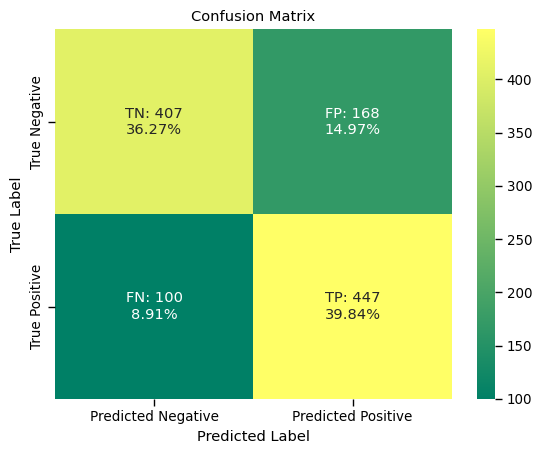

In [71]:
model_evaluation(lr, Xtest, Ytest)

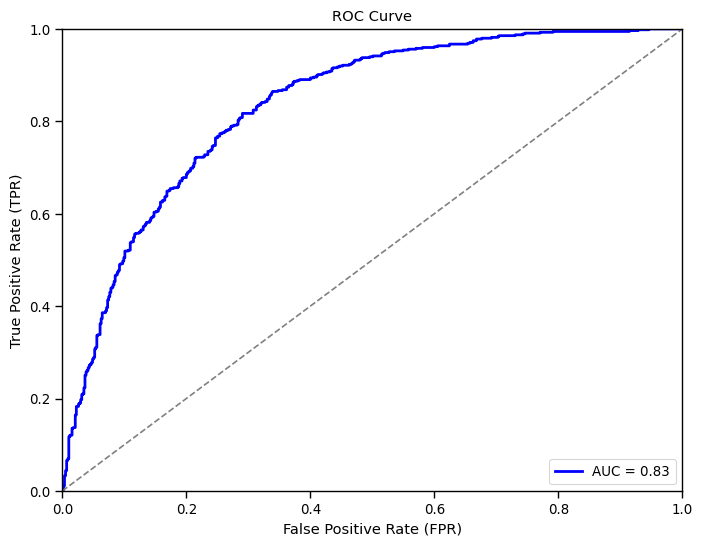

0.8334981321039662

In [72]:
auc_roc_evaluation(lr, Xtest, Ytest)

In this case, we observed that adjusting the parameters had a minimal impact on the performance of the Logistic Regression (LR) model. The final accuracy was 0.76, F1-score is 0.77  and the AUC (Area Under the ROC Curve) was 0.83.

##### 2) random forest

In [73]:
# here I start to use random forest model
rfc=RandomForestClassifier(random_state=30)
rfc=rfc.fit(Xtrain,Ytrain)

In [74]:
result_train=rfc.score(Xtrain,Ytrain)
print(f'rfc train score is {result_train}')
result_test=rfc.score(Xtest,Ytest)
print(f'rfc test score is {result_test}')

rfc train score is 0.9984709480122325
rfc test score is 0.7450980392156863


I have built a random forest  model, but I have noticed severe overfitting in the results. Therefore, I want to prune the model to address this issue.

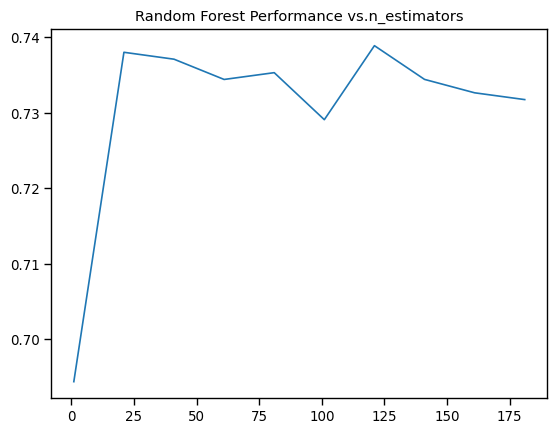

In [75]:
##### First, I will adjust the n_estimators, aim to find a range of best n_estimator
result=[]
for i in np.arange(1,200,20):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(1,200,20),result,label="n_estimators")
plt.title('Random Forest Performance vs.n_estimators')
plt.show()

In [76]:
result=np.array(result)
optimal_nestimators=np.argmax(result)
np.arange(1,200,20)[optimal_nestimators]

121

In [77]:
np.arange(1,200,20)
# from result we can find best n_estimators is between 101 and 141

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181])

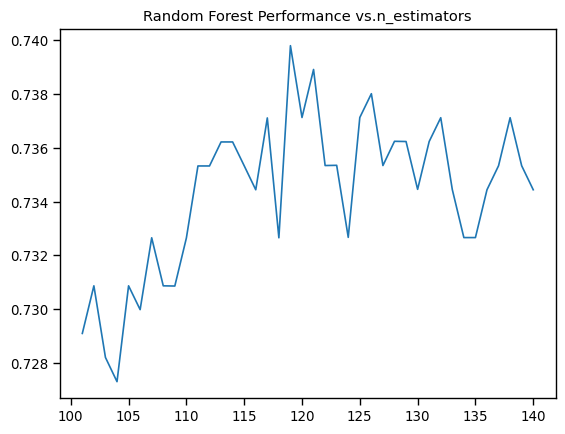

In [79]:
##### narrow down  n_estimators range and choose best parameter
result=[]
for i in np.arange(101,141,1):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot( np.arange(101,141,1),result,label="n_estimators")
plt.title('Random Forest Performance vs.n_estimators')
plt.show()

In [80]:
result=np.array(result)
best_result=np.argmax(result)
best_result
np.arange(101,141,1)[best_result] # from here we can know best n_estimators is around 197

119

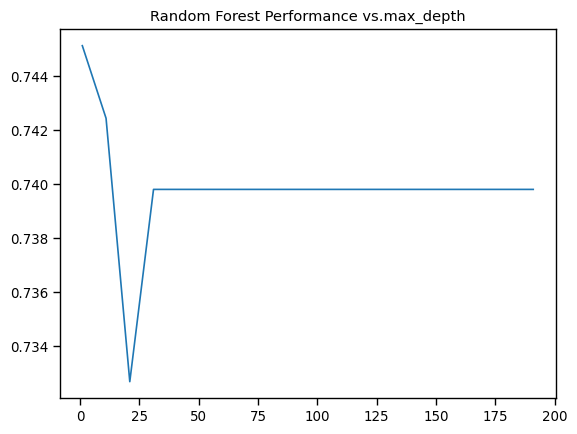

In [81]:
#after that to adjust max_depth and have large at first
result=[]
for i in np.arange(1,200,10):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(1,200,10),result,label="max_depth")
plt.title('Random Forest Performance vs.max_depth')
plt.show()

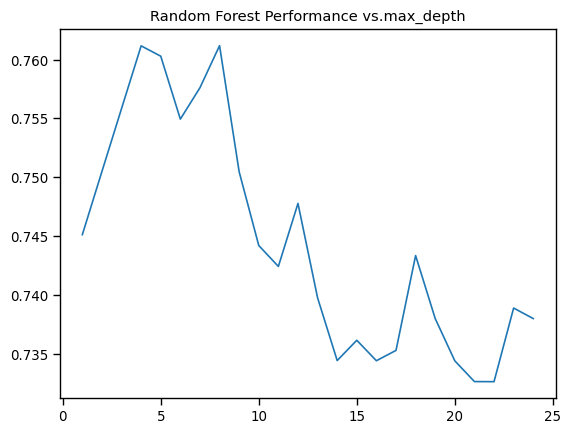

In [82]:
# narrow down max_depth range and choose best parameter
result=[]
for i in np.arange(1,25,1):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)

plt.plot(np.arange(1,25,1),result,label="max_depth")
plt.title('Random Forest Performance vs.max_depth')
plt.show()

In [83]:
result=np.array(result)
max_index=np.argmax(result)
max_index

7

Based on the results, we can identify the optimal max_depth which is around 6, and we can  make the final decision accordingly.

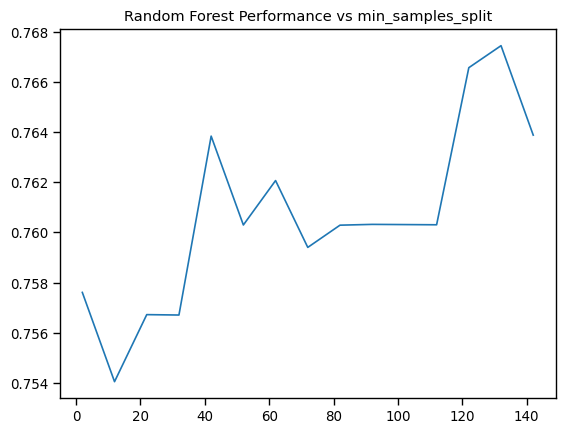

In [84]:
#after that to adjust min_samples_split（choose a range at first）
result=[]
for i in np.arange(2,150,10):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=7
                               ,min_samples_split=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(2,150,10),result,label="min_samples_split")
plt.title('Random Forest Performance vs min_samples_split')
plt.show()

In [85]:
result = np.array(result)
optimal_split_index = np.argmax(result)
optimal_min_samples_split = np.arange(2, 150, 10)[optimal_split_index]
optimal_min_samples_split 

132

In [86]:
np.arange(2,150,10)
# from here we can decide best min_samples_split is between 112 and 132

array([  2,  12,  22,  32,  42,  52,  62,  72,  82,  92, 102, 112, 122,
       132, 142])

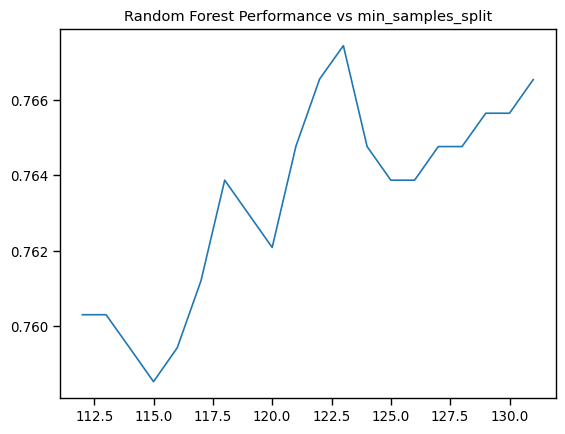

In [87]:
# in order to run quickly during grid search， I narrow down range here

result=[]
for i in np.arange(112,132,1):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=7
                               ,min_samples_split=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(112,132,1),result,label="min_samples_split")
plt.title('Random Forest Performance vs min_samples_split')
plt.show()

In [88]:
result=np.array(result)
best_result=np.argmax(result)
best_result
np.arange(112,132,1)[best_result]
# from here we can see 123 is the best min_samples_split

123

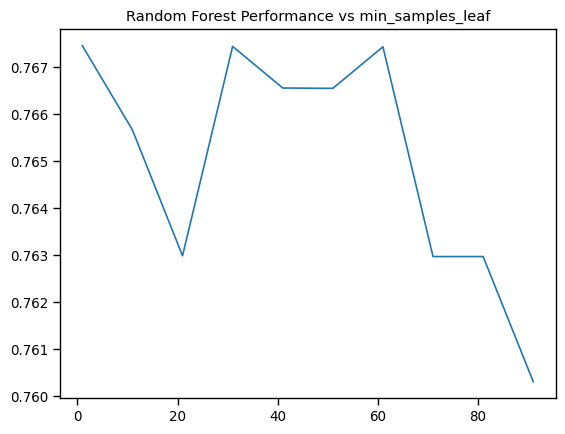

In [89]:
#after that to adjust min_samples_leaf（choose a range at first）
result=[]
for i in np.arange(1,100,10):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=7
                               ,min_samples_split=123
                               ,min_samples_leaf=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(1,100,10),result,label="min_samples_leaf")
plt.title('Random Forest Performance vs min_samples_leaf')
plt.show()

In [90]:
result = np.array(result)
best_result_index = np.argmax(result)
best_min_samples_leaf = np.arange(1, 100, 10)[best_result_index]
best_min_samples_leaf

1

In [91]:
np.arange(1,100,10)
# from here we can find best min_samples_leaf is around 1 to 11

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

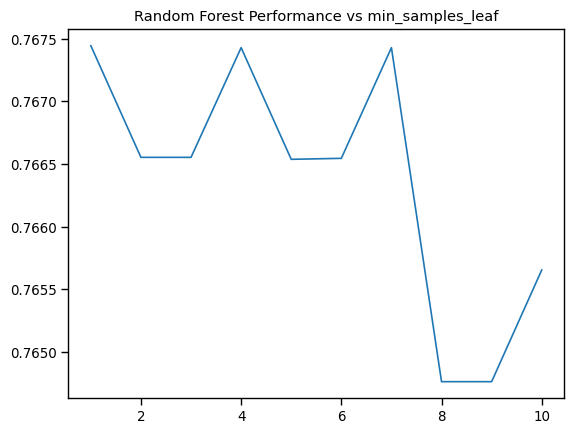

In [92]:
#after that to adjust min_samples_leaf（choose a range at first）
result=[]
for i in np.arange(1,11,1):
    rfc=RandomForestClassifier(random_state=30
                               ,n_estimators=119
                               ,max_depth=7
                               ,min_samples_split=123
                               ,min_samples_leaf=i)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    result.append(score)


plt.plot(np.arange(1,11,1),result,label="min_samples_leaf")
plt.title('Random Forest Performance vs min_samples_leaf')
plt.show()

In [93]:
result=np.array(result)
best_result=np.argmax(result)
best_result
np.arange(1,11,1)[best_result]
# from here we can see  is the best min_samples_split

1

In [94]:
# here we decide max_features, beacuse we have 20 features and our model is not overfitting currently so I makes it move 2 sides to see the result change
max_features_values = list(range(1, 21))  

max_features_values.extend(['auto', 'sqrt', 'log2', None])


for max_features_val in max_features_values:
    rfc = RandomForestClassifier(random_state=30
                                ,n_estimators=119
                                ,max_depth=7
                                ,min_samples_split=123
                                ,min_samples_leaf=1
                                ,max_features=max_features_val)
    rfc=rfc.fit(Xtrain,Ytrain)
    score=cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
    print(f"max_features={max_features_val}: {score}")

max_features=1: 0.7495970290771176
max_features=2: 0.7585176991150442
max_features=3: 0.7647518963337547
max_features=4: 0.7674462705436157
max_features=5: 0.7567398862199748
max_features=6: 0.765644753476612
max_features=7: 0.7656447534766119
max_features=8: 0.7612120733249051
max_features=9: 0.7629898862199747
max_features=10: 0.7638669405815424
max_features=11: 0.7576485461441214
max_features=12: 0.7531921618204804
max_features=13: 0.7603113147914032
max_features=14: 0.7540771175726928
max_features=15: 0.7513985461441214
max_features=16: 0.7549857774968395
max_features=17: 0.7522835018963338
max_features=18: 0.754069216182048
max_features=19: 0.754069216182048
max_features=20: 0.7522914032869785
max_features=auto: 0.7674462705436157
max_features=sqrt: 0.7674462705436157
max_features=log2: 0.7674462705436157
max_features=None: 0.7522914032869785


from here we can observe max_feature did not have significance influence to the result and we can just use auto here

In [95]:
# After that I will use grid search to adjust all parameters together
params={'max_depth':[6,7,8]
       ,'min_samples_split':[122,123,124]
       ,'min_samples_leaf':[1,2,3]
       ,'criterion':['gini','entropy']
       ,'n_estimators':[118,119,120]}
clf=RandomForestClassifier(random_state=30)
gsc=GridSearchCV(estimator=clf,param_grid=params,cv=5)
gsc=gsc.fit(Xtrain,Ytrain)
print(gsc.best_params_)
print(gsc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 123, 'n_estimators': 119}
0.7695079765883845


In [96]:
clf=RandomForestClassifier(**gsc.best_params_)
clf=clf.fit(Xtrain,Ytrain)

Accuracy: 0.76
Precision:0.72
recall:0.82
f1_score:0.77


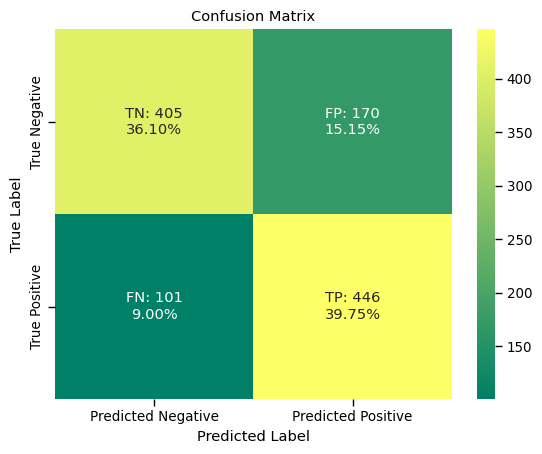

In [97]:
model_evaluation(clf, Xtest, Ytest)

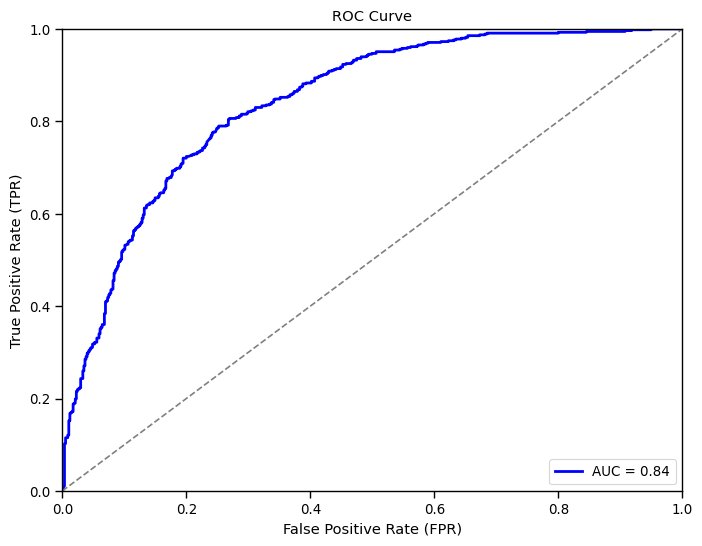

0.8404673714331133

In [98]:
auc_roc_evaluation(clf, Xtest, Ytest)

The final accuracy of random forest was 0.76, F1-score is 0.77  and the AUC (Area Under the ROC Curve) was 0.84.

##### 3）SVM

In [99]:
# here I will use SVC model  
clf_svc= svm.SVC()
clf_svc=clf_svc.fit(Xtrain,Ytrain)

train_score = clf_svc.score(Xtrain, Ytrain)
test_score = clf_svc.score(Xtest, Ytest)
print('svc train_score is', train_score)
print('svc test_score is', test_score)

svc train_score is 0.8004587155963303
svc test_score is 0.750445632798574


In [100]:
# here I start to adjust parameters and start from kernel
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:

    clf_svc=svm.SVC(kernel=kernel,random_state=30).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel,clf_svc.score(Xtest,Ytest)))
# we can see rbf have better performance

The accuracy under kernel linear is 0.729947
The accuracy under kernel poly is 0.752228
The accuracy under kernel rbf is 0.750446
The accuracy under kernel sigmoid is 0.651515


In [101]:
c_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigmavalues = c_values
best_pair, best_score = (0, 0), 0

for C in c_values:
    for sigma in sigmavalues:
        gamma = 1.0 / (2.0 * sigma**2) 
        model = svm.SVC(C=C, kernel='rbf', gamma=gamma,random_state=30, probability=True)
        model.fit(Xtrain, Ytrain)
        this_score = model.score(Xtest, Ytest)

        if this_score > best_score:
            best_score = this_score
            best_pair = (C, sigma)

print('best pair:', best_pair, 'best score:', best_score)

best pair: (1, 3) best score: 0.7513368983957219


In [102]:
best_gamma=1.0 / (2.0 * 10**2)
best_gamma

0.005

In [103]:
clf_svc=svm.SVC(C=3
                ,gamma=0.005
                ,kernel='rbf'
                ,random_state=30
                ,probability=True).fit(Xtrain,Ytrain)

Accuracy: 0.74
Precision:0.70
recall:0.84
f1_score:0.76


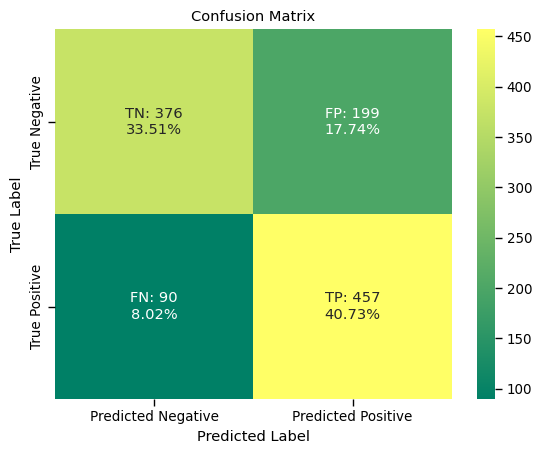

In [104]:
model_evaluation(clf_svc, Xtest, Ytest)

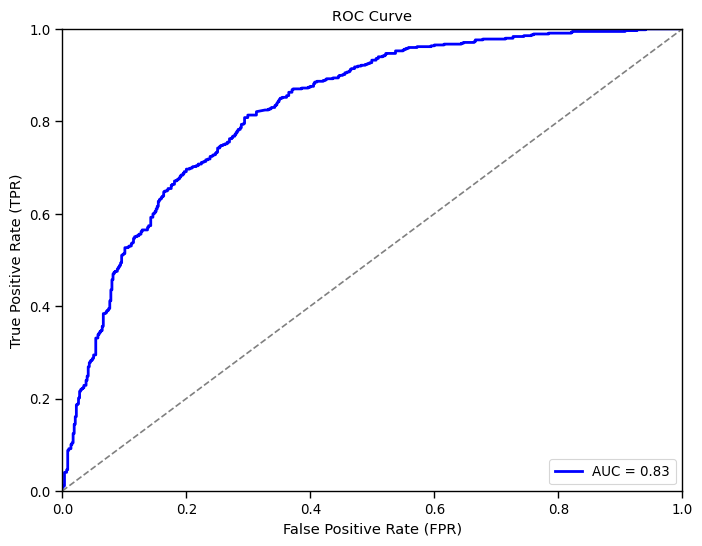

0.8283157141721644

In [105]:
auc_roc_evaluation(clf_svc,  Xtest, Ytest)

The final accuracy of SVM  was 0.74, F1-score is 0.76  and the AUC (Area Under the ROC Curve) was 0.83.

##### 4）KNN

In [106]:
knn = neighbors.KNeighborsClassifier()
knn=knn.fit(Xtrain,Ytrain)
train_sroce=knn.score(Xtrain,Ytrain)
test_sroce=knn.score(Xtest,Ytest)
print('knn train_score is', train_score)
print('knn test_srocee is', test_sroce)

knn train_score is 0.8004587155963303
knn test_srocee is 0.7370766488413547


In [107]:
best_score = 0.0
best_k = -1
best_method = ''


# Assuming Xtrain and Ytrain are the training features and labels, respectively.
# Assuming Xtest and Ytest are the test features and labels, respectively.

for method in ["uniform", "distance"]:
    for k in range(1, 200):
        knn_clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=method) # Use weights parameter for distance metric
        knn_clf = knn_clf.fit(Xtrain, Ytrain)
        knn_score = knn_clf.score(Xtest, Ytest)
        if knn_score > best_score or (knn_score == best_score and k < best_k):
            best_score = knn_score
            best_k = k
            best_method = method

print('best_k=', best_k)
print('best_score=', best_score)
print('best_method=', best_method)


best_k= 12
best_score= 0.7629233511586453
best_method= uniform


In [109]:
knn = neighbors.KNeighborsClassifier(n_neighbors=12,weights='uniform')
knn_clf=knn.fit(Xtrain,Ytrain)

Accuracy: 0.76
Precision:0.74
recall:0.80
f1_score:0.77


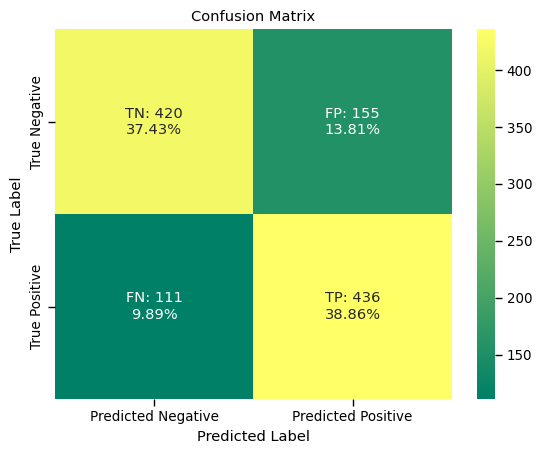

In [110]:
model_evaluation(knn_clf, Xtest, Ytest)

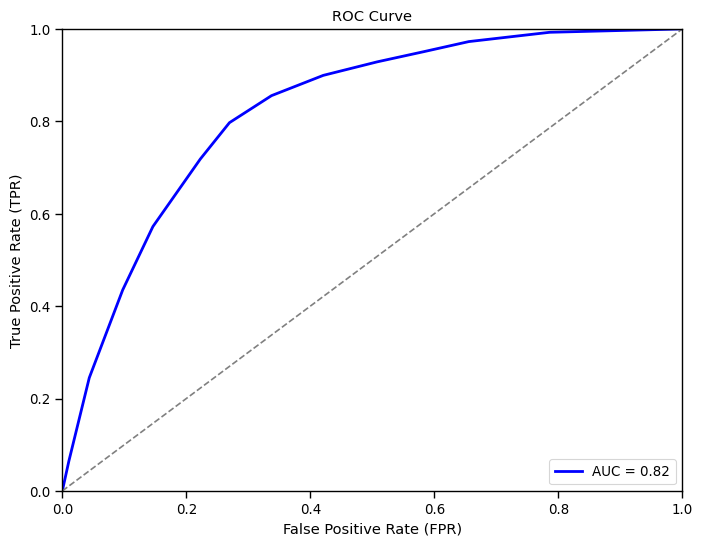

0.8238566091725619

In [111]:
auc_roc_evaluation(knn_clf, Xtest, Ytest)

The final accuracy of KNN  was 0.76, F1-score is 0.77  and the AUC (Area Under the ROC Curve) was 0.82.

The final result of 4 models are:

Logistic Regression - Accuracy: 0.76, AUC: 0.83

Random Forest - Accuracy: 0.76, AUC: 0.84

SVM - Accuracy: 0.74, AUC: 0.83

KNN - Accuracy: 0.76, AUC: 0.82

These results demonstrate the performance of four different machine learning models on the dataset. From the perspective of accuracy and AUC values, the Random Forest model slightly outperforms the others in terms of AUC. 

The remaining three models exhibit similar performance in both accuracy and AUC.

### 5.final result （Random Forest - Accuracy: 0.76, AUC: 0.84）

In [113]:
clf=RandomForestClassifier(**gsc.best_params_)
clf=clf.fit(Xtrain,Ytrain)
model_parameters = clf.get_params()
print("Model Parameters:", model_parameters)

Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 123, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 119, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [119]:
feature_importances = clf.feature_importances_
features_list = Xtrain.columns

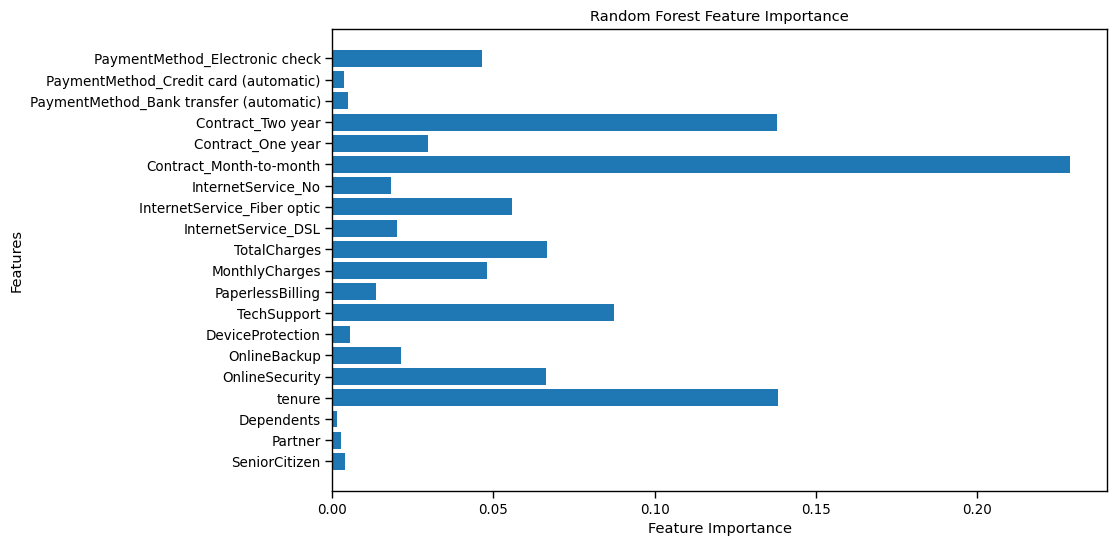

In [120]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(features_list)), feature_importances, align='center')
plt.yticks(range(len(features_list)), features_list)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

Random Forest - Accuracy: 0.76, AUC: 0.84